# Module 1 Code Challenge Review 

_May 20, 2020_ 

## Part II. Code Challenge Reviews

#### 1. Pandas Operations

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [4]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# examine the dimensions of it
df.shape

(150, 5)

In [9]:
# check to see if you have missing values
#df.describe()
df.isnull().sum()
#df.isna.any()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.iloc[2,1:3]= np.nan
df.isnull().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     0
species         0
dtype: int64

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,NaN,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# remove missing values (rows and columns)
df.dropna(axis=0,subset=['sepal_width'],inplace=True)

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [16]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_lenght_10']=df.sepal_length.map(lambda x: x*10)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_lenght_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0


In [19]:
df['sepal_length_10_2']= df.sepal_length*10
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_lenght_10,sepal_length_10_2
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0,54.0


#### 2. Data Visualization

In [21]:
# what is the difference between a bar chart, a histogram, and a scatterplot?

# let's plot the average pedal length for each species of iris 

y = df.groupby(['species']).petal_length.mean()
x = y.index

Text(0.5, 1.0, 'Average petal length')

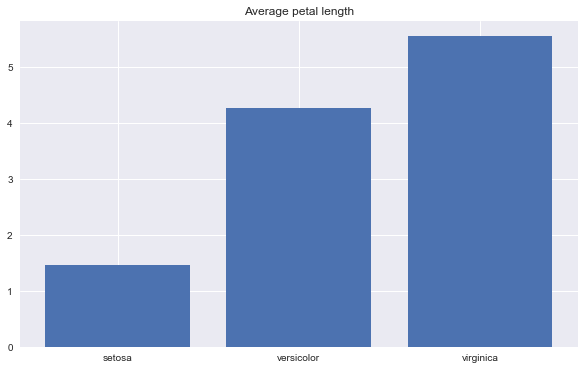

In [23]:
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)
ax.set_title('Average petal length')

<BarContainer object of 4 artists>

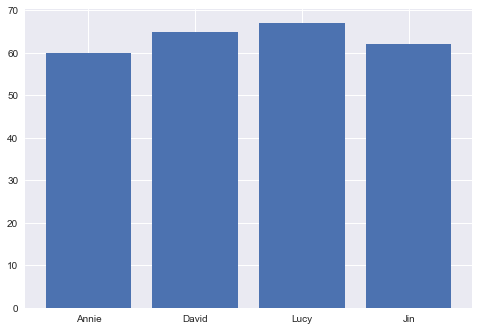

In [24]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons,height)


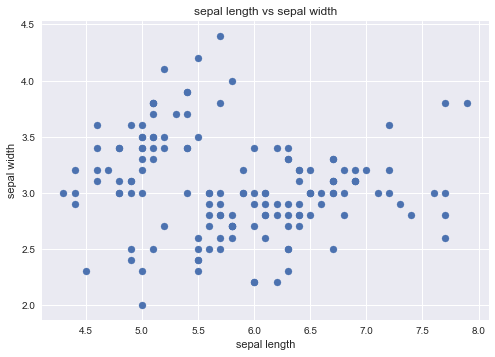

In [25]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [27]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_lenght_10,sepal_length_10_2
sepal_length,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000
sepal_width,-0.115303,1.000000,-0.428329,-0.365487,-0.115303,-0.115303
petal_length,0.870066,-0.428329,1.000000,0.962424,0.870066,0.870066
petal_width,0.815701,-0.365487,0.962424,1.000000,0.815701,0.815701
sepal_lenght_10,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000
sepal_length_10_2,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000


Can you describe the relationship above?

## Part III. Statistics 

In [28]:
# calculate the mean and median value for sepal length 
df.sepal_length.mean()
df.sepal_length.describe()


count    149.000000
mean       5.851007
std        0.825491
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [34]:
# what can you say about the distribution of sepal length and sepal width based on this distribution?

In [32]:
# which flower has the longest pedal? what is the species of that flower?
df[df['petal_length']== df['petal_length'].max()]['species']

118    virginica
Name: species, dtype: object

## Part IV. Python Data Structure 

In [33]:
Pets = {
    'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon',
        'teams': ['Alert','Independent','Playful']
    }],
    'Chuck Norris': [{
        'age': 8,
        'type': 'Parrot',
        'teams': ['Talkative','Independent','Cheery']
    }],
    'Joe Rogan': [{
        'age': 2,
        'type': 'Labrador',
        'teams': ['Hyper','Playful','Energetic']
    }]
}

In [35]:
Pets['Ginger'][0]['type']

'Pitbull'

In [9]:
# loop through the dictionary, create a list of names containing all pets' names
pet_names = [key for key in Pets.keys()]
pet_names

['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [41]:
# loop through the dictionary, create a list of type containing all types of pets 
pet_types = [values[0]['type'] for values in Pets.values()]
pet_types

['Pitbull', 'Maine Coon', 'Parrot', 'Labrador']

In [58]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
#def pets_older_than_4(pets, age):
def older_than_x(pets, age):
    list_of_names = []
    pet_names = [key for key in pets.keys()]
    pet_ages = [pets[pet_name][0]['age'] for pet_name in pet_names]
    age_bool = [age>4 for age in pet_ages]
    for index, bool in enumerate(age_bool):
        if bool:
            list_of_names.append(pet_names[index])
            return list_of_names
        
        

def pets_older_than_4(pets, age):
    return [key for key, value in Pets.items() if value[0]['age'] > 4]